 The StrataFlip game is based on the description provided
in Sect. 3. In this game, two players compete over a network with multiple nodes.
A node can be any machine in the network. In our experiment we used six nodes:
Node A(10/8), Node B(10/2), Node C(4/2), Node D(4/8), Node E(10/5), Node
F(0/0). Each node has a reward (ρ)andacost(γ). For example, Node A has
reward 10 and cost 8. The defender/attacker has to pay the cost each time
he wants to defend/capture a node. Each node can be either captured by the
attacker (red) or not (blue) as shown in Fig. 3.

The game has ﬁve rounds. Initially, the defender has control over all of the
nodes. The purpose of the attacker/participant is to take over control from the
defender by attacking nodes. In each round, the defender defends a node and
the attacker attacks a node. If the attacker or defender chooses to attack/defend
a node he/she has to pay the cost associated with that node. 

If the defender and attacker do not make the same move then the attacker takes control 
of the node and receives the reward associated with that node and pays the cost. If
both players make the same move then the previous controller of the resource
retains the control and attacker and defender both pay the cost. In each round,
the user interface shows the following information: total points, current round,
time, action history (log), and who currently controls each node. After 
eachround the attacker receives points for all the nodes he controls. Red and blue
mean the attacker or the defender controls a node, respectively. The attacker is
able to observe the eﬀect of the defender action in the next round. Each player
tries to maximize their utility by controlling the nodes.

In [1]:
from pyibl import Agent
import pyibl
import random
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd

In [2]:
attacker_agent = Agent(["reward","cost"],decay=0.5, noise=0.25) # define the agent to choose from boxes
defender_agent = Agent(["reward","cost"],decay=0.5, noise=0.25) # define the agent to choose from boxes


A= { "reward": 10, "cost": -8 }
B= { "reward": 10, "cost": -2 }
C= { "reward": 4, "cost": -2 }
D= { "reward": 4, "cost": -8 }
E= { "reward": 10, "cost": -5 }
F= { "reward": 0, "cost": 0 }
card_options = [A,B,C,D,E,F] #option for cards


In [3]:
def reward_attack(choice_attack,choice_defend): #function for agent respond(outcome) according to the conding of the game
    
    if choice_attack==choice_defend:
        if choice_attack in attacker_controls: # is rewards okay?
            if choice_attack==A:     
                r=2
            elif choice_attack==B:
                r=8
            elif choice_attack==C:
                r=2
            elif choice_attack==D:
                r=-4
            elif choice_attack==E:
                r=5
            elif choice_attack==F:
                r=0
                
        elif choice_attack in defender_controls: # is rewards okay?
            if choice_attack==A:     
                r=-8
            elif choice_attack==B:
                r=-2
            elif choice_attack==C:
                r=-2
            elif choice_attack==D:
                r=-8
            elif choice_attack==E:
                r=-5
            elif choice_attack==F:
                r=0
            
   
            
    if choice_attack!=choice_defend:
        if choice_attack==A:
            r=2
        elif choice_attack==B:
            r=8
        elif choice_attack==C:
            r=2
        elif choice_attack==D:
            r=-4
        elif choice_attack==E:
            r=5
        elif choice_attack==F:
            r=0
        
        
    return r

In [4]:

def reward_defend(choice_attack,choice_defend): #function for agent respond(outcome) according to the conding of the game
    
    
    if choice_defend!=choice_attack:

        if choice_defend==A:
            r2=-8-2
        elif choice_defend==B:
            r2=-2-8
        elif choice_defend==C:
            r2=-2-2
        elif choice_defend==D:
            r2=-8+4
        elif choice_defend==E:
            r2=-5-5
        elif choice_defend==F:
            r2=0
            
            
    if choice_defend==choice_attack:
            
            if choice_defend==A:
                r2=-8
            elif choice_defend==B:
                r2=-2
            elif choice_defend==C:
                r2=-2
            elif choice_defend==D:
                r2=-8
            elif choice_defend==E:
                r2=-5
            elif choice_defend==F:
                r2=0
        

        
    return r2





In [6]:



mismatch=2.5
    
participants = 152 # number of runs (participants)
rounds = 6 # number of trials 
games=5

average_p_A=[]
average_p_B=[]
average_p_C=[]
average_p_D=[]
average_p_E=[]
average_p_F=[]
avrg_win=[]
avrg_score_list=[]
avrg_score=0

average_time = [] # to save time 


for i in range(participants): # Participants
    
    
    pmax_A_participants=[]
    pmax_B_participants=[]
    pmax_C_participants=[]
    pmax_D_participants=[]
    pmax_E_participants=[]
    pmax_F_participants=[]
    
    win_participants=[]
    score_list_participants=[]
   
    
    ttime = [0]
        
    attacker_agent.reset() #clear the memory for a new run
    defender_agent.reset() #clear the memory for a new run
    
    attacker_agent.similarity(["reward"], lambda x, y: 1 - abs((x - y)/10))    # what does lamda x,y mean? is the implication okay?
    attacker_agent.similarity(["cost"], lambda x, y: 1 - abs((x - y)/8))

    defender_agent.similarity(["reward"], lambda x, y: 1 - abs((x - y)/10))
    defender_agent.similarity(["cost"], lambda x, y: 1 - abs((x - y)/8))

    attacker_agent.mismatch_penalty=mismatch 
    defender_agent.mismatch_penalty=mismatch 
    
    
    attacker_agent.populate([{"reward":10,"cost":-8}],2)
    attacker_agent.populate([{"reward":10,"cost":-2}],8)
    attacker_agent.populate([{"reward":4,"cost":-2}],2)
    attacker_agent.populate([{"reward":4,"cost":-8}],-4)
    attacker_agent.populate([{"reward":10,"cost":-5}],5)
    attacker_agent.populate([{"reward":0,"cost":0}],0)
  
    
    defender_agent.populate([{"reward":10,"cost":-8}],2)
    defender_agent.populate([{"reward":10,"cost":-2}],8)
    defender_agent.populate([{"reward":4,"cost":-2}],2)
    defender_agent.populate([{"reward":4,"cost":-8}],-4)
    defender_agent.populate([{"reward":10,"cost":-5}],5)
    defender_agent.populate([{"reward":0,"cost":0}],0)
    
    
    #attacker_agent.populate([{"reward":10,"cost":-8}],30)
    #attacker_agent.populate([{"reward":10,"cost":-2}],30)
  
    #defender_agent.populate([{"reward":10,"cost":-8}],30)
    #defender_agent.populate([{"reward":10,"cost":-2}],30)
    
    
    for i in range(rounds):
        
        pmax_A_round=[]
        pmax_B_round=[]
        pmax_C_round=[]
        pmax_D_round=[]
        pmax_E_round=[]
        pmax_F_round=[]
        win_round=[]
        score_list_round=[]
        
        defender_controls_initial=[A,B,C,D,E,F]
        defender_controls=[]
        attacker_controls=[]
    

        for i in range(games): 


            start = time.time()
            choice_attack = attacker_agent.choose(card_options) # choose one option from the list of two box
            choice_defend = defender_agent.choose(card_options) # choose one option from the attack/withdraw
            # determine the reward that agent can receive
            #print(choice_2)
            
            
             
            if choice_attack==choice_defend:
                if choice_attack not in attacker_controls and choice_attack in defender_controls_initial:
                    defender_controls.append(choice_defend)
                elif choice_attack not in defender_controls:
                    attacker_controls.append(choice_attack)
            else:
                attacker_controls.append(choice_attack)
        



            r_attack=reward_attack(choice_attack,choice_defend)

            r_defend=reward_defend(choice_attack,choice_defend)



            # store the instance
            attacker_agent.respond(r_attack)
            defender_agent.respond(r_defend)
            end = time.time()
            ttime.append(ttime[-1]+ end - start)

            pmax_A_round.append(choice_attack==A)
            pmax_B_round.append(choice_attack==B)
            pmax_C_round.append(choice_attack==C)
            pmax_D_round.append(choice_attack==D)
            pmax_E_round.append(choice_attack==E)
            pmax_F_round.append(choice_attack==F)

            win_round.append(choice_attack != choice_defend)
            score_list_round.append(r_attack)
          

        pmax_A_participants.append(pmax_A_round)
        pmax_B_participants.append(pmax_B_round)
        pmax_C_participants.append(pmax_C_round)
        pmax_D_participants.append(pmax_D_round)
        pmax_E_participants.append(pmax_E_round)
        pmax_F_participants.append(pmax_F_round)
        
        win_participants.append(win_round)
        score_list_participants.append(score_list_round)
     
        
    
    average_p_A.append(pmax_A_participants)
    average_p_B.append(pmax_B_participants)
    average_p_C.append(pmax_C_participants)
    average_p_D.append(pmax_D_participants)
    average_p_E.append(pmax_E_participants)
    average_p_F.append(pmax_F_participants)
    
    avrg_win.append(win_participants)
    avrg_score_list.append(score_list_participants)
   

    average_time.append(ttime) # save time of each run 





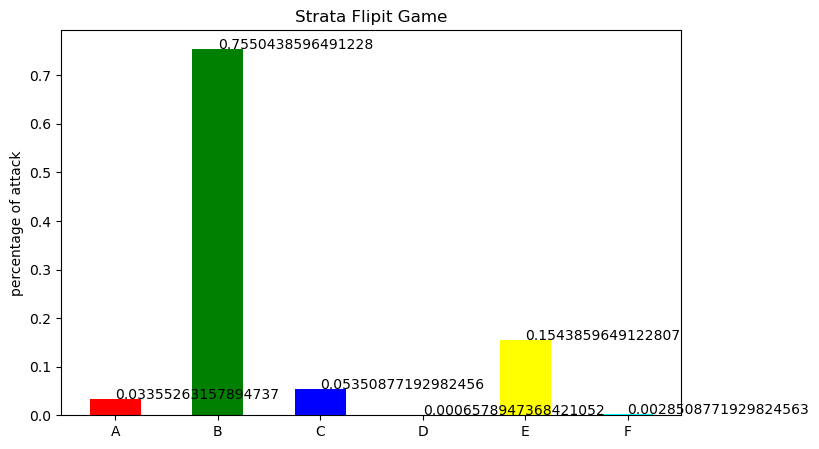

In [7]:
x=["A","B","C","D","E","F"]
y=[(np.mean(np.asarray(average_p_A))),(np.mean(np.asarray(average_p_B))),(np.mean(np.asarray(average_p_C))),(np.mean(np.asarray(average_p_D))),(np.mean(np.asarray(average_p_E))),(np.mean(np.asarray(average_p_F)))]
  
fig = plt.figure(figsize = (8, 5))
 
# creating the bar plot
plt.bar(x, y, color =['red','green','blue','orange','yellow','cyan'],width=.5)
 
#plt.xlabel("")


for index, value in enumerate(y):
    plt.text(index, value, str(value))
    
plt.ylabel("percentage of attack")
plt.title("Strata Flipit Game")
plt.show()

In [9]:
avrg_score_list

[[[-2, -5, 2, 2, 8],
  [8, 8, 8, 8, 5],
  [8, 8, 8, 8, 8],
  [8, 8, 8, 8, 8],
  [8, 8, 8, 5, 8],
  [8, 8, 2, 8, 8]],
 [[-2, -5, 2, 8, 8],
  [8, 8, 8, 8, 8],
  [-2, 8, 8, 8, 5],
  [8, 8, 5, 8, 8],
  [8, 8, 8, 8, 8],
  [8, 8, 8, 8, 8]],
 [[-2, 8, 8, 8, 8],
  [8, 8, 8, 8, 8],
  [8, 8, 8, 8, 8],
  [5, 8, 8, 8, 8],
  [8, 8, 8, 8, 8],
  [8, 5, 8, 8, 8]],
 [[-2, 5, 5, 8, 8],
  [5, 8, 8, 8, 8],
  [8, 8, 8, 8, 8],
  [8, 8, 8, 8, 8],
  [8, 8, 8, 8, 8],
  [8, 8, 8, 8, 8]],
 [[5, 8, 8, 8, 8],
  [8, 8, 8, 8, 8],
  [8, 8, 8, 8, 8],
  [8, 8, 8, 5, 8],
  [8, 2, 8, 8, 8],
  [8, 8, 8, 8, 8]],
 [[-2, -5, 2, 2, 8],
  [8, 8, 8, 8, 8],
  [8, 8, 8, 8, 8],
  [5, 8, 8, 5, 8],
  [8, 8, 8, 8, 8],
  [8, 8, 8, 8, 8]],
 [[-2, -5, 2, 2, 8],
  [8, 8, 8, 8, 8],
  [8, 8, 8, 8, 8],
  [8, 8, 8, 5, 8],
  [8, 8, 8, 8, 8],
  [8, 8, 8, 8, 8]],
 [[-2, 2, 8, -2, 8],
  [8, 8, 8, 5, 8],
  [8, 8, 8, 8, 8],
  [8, 8, 8, 8, 2],
  [5, 8, 8, 8, 8],
  [8, 8, 8, 8, 8]],
 [[-2, -5, -2, 5, 5],
  [5, 5, 5, 5, 2],
  [5, 5, 5, 2, 5],
  [5, 5

In [10]:
X = np.dstack([avrg_score_list[i] 
        for i in range(0,152)])

res = np.mean(X, axis=2)

In [11]:
res

array([[-1.77631579,  0.81578947,  3.24342105,  4.43421053,  5.59210526],
       [ 5.125     ,  6.33552632,  6.38815789,  6.55263158,  6.78289474],
       [ 6.24342105,  6.99342105,  6.86184211,  7.23026316,  7.09210526],
       [ 6.65131579,  6.84868421,  7.50657895,  7.32894737,  7.42105263],
       [ 6.86842105,  7.22368421,  7.25      ,  7.48026316,  7.44078947],
       [ 6.85526316,  7.35526316,  7.46710526,  7.38815789,  7.42105263]])

In [12]:
res.sum()

186.42105263157896

In [13]:
average_p_A

[[[False, False, False, False, False],
  [False, False, False, False, False],
  [False, False, False, False, False],
  [False, False, False, False, False],
  [False, False, False, False, False],
  [False, False, False, False, False]],
 [[False, False, False, False, False],
  [False, False, False, False, False],
  [False, False, False, False, False],
  [False, False, False, False, False],
  [False, False, False, False, False],
  [False, False, False, False, False]],
 [[False, False, False, False, False],
  [False, False, False, False, False],
  [False, False, False, False, False],
  [False, False, False, False, False],
  [False, False, False, False, False],
  [False, False, False, False, False]],
 [[False, False, False, False, False],
  [False, False, False, False, False],
  [False, False, False, False, False],
  [False, False, False, False, False],
  [False, False, False, False, False],
  [False, False, False, False, False]],
 [[False, False, False, False, False],
  [False, False, Fals

In [14]:
XA = np.dstack([average_p_A[i] 
        for i in range(0,152)])

resA = np.mean(XA, axis=2)



XB = np.dstack([average_p_B[i] 
        for i in range(0,152)])

resB = np.mean(XB, axis=2)



XC = np.dstack([average_p_C[i] 
        for i in range(0,152)])

resC = np.mean(XC, axis=2)


XD = np.dstack([average_p_D[i] 
        for i in range(0,152)])

resD = np.mean(XD, axis=2)


XE = np.dstack([average_p_E[i] 
        for i in range(0,152)])

resE = np.mean(XE, axis=2)


XF = np.dstack([average_p_F[i] 
        for i in range(0,152)])

resF = np.mean(XF, axis=2)

In [15]:
XA2 = np.dstack([resA[i] 
        for i in range(0,6)])

resA2 = np.mean(XA2, axis=1)


XB2 = np.dstack([resB[i] 
        for i in range(0,6)])

resB2 = np.mean(XB2, axis=1)


XC2 = np.dstack([resC[i] 
        for i in range(0,6)])

resC2 = np.mean(XC2, axis=1)


XE2 = np.dstack([resE[i] 
        for i in range(0,6)])

resE2 = np.mean(XE2, axis=1)


XD2 = np.dstack([resD[i] 
        for i in range(0,6)])

resD2 = np.mean(XD2, axis=1)

XE2 = np.dstack([resE[i] 
        for i in range(0,6)])

resE2 = np.mean(XE2, axis=1)


XF2 = np.dstack([resF[i] 
        for i in range(0,6)])

resF2 = np.mean(XF2, axis=1)

In [16]:
resA2

array([[0.08947368, 0.05789474, 0.01447368, 0.01578947, 0.01315789,
        0.01052632]])

In [17]:
XA2

array([[[0.        , 0.07894737, 0.01973684, 0.01973684, 0.        ,
         0.01973684],
        [0.07894737, 0.06578947, 0.01315789, 0.03947368, 0.00657895,
         0.        ],
        [0.08552632, 0.03947368, 0.01315789, 0.        , 0.04605263,
         0.00657895],
        [0.15789474, 0.06578947, 0.00657895, 0.01315789, 0.00657895,
         0.00657895],
        [0.125     , 0.03947368, 0.01973684, 0.00657895, 0.00657895,
         0.01973684]]])

In [18]:
resE2

array([[0.29342105, 0.20526316, 0.14736842, 0.11184211, 0.08421053,
        0.08421053]])

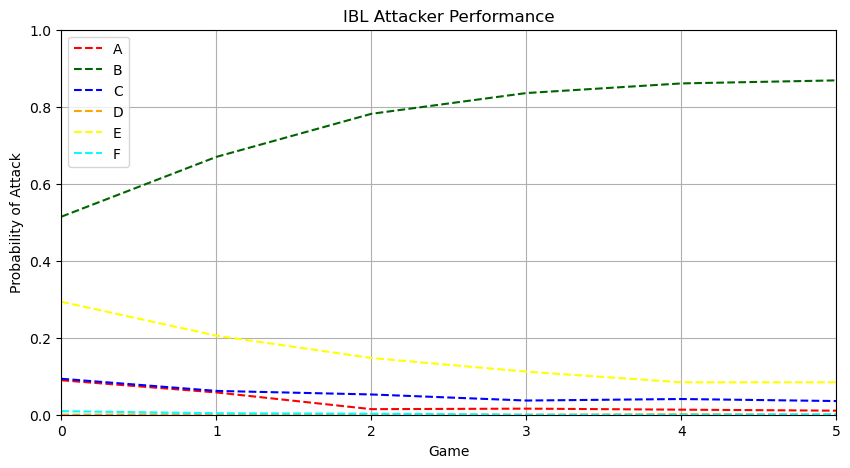

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
import numpy as np 
plt.plot(range(6), resA2[0], color='red', markersize=2, linestyle='--', label='A')

plt.plot(range(6),resB2[0] , color='darkgreen',markersize=2, linestyle='--', label='B')
plt.plot(range(6),resC2[0] , color='blue', markersize=2, linestyle='--', label='C')
plt.plot(range(6),resD2[0], color='orange', markersize=2, linestyle='--', label='D')
plt.plot(range(6),resE2[0], color='yellow', markersize=2, linestyle='--', label='E')
plt.plot(range(6),resF2[0], color='cyan', markersize=2, linestyle='--', label='F')

plt.xlabel('Game')
plt.ylabel('Probability of Attack')
plt.title('IBL Attacker Performance')
plt.ylim(0,1)
plt.xlim(0,5)
plt.xticks([0,1,2,3,4,5])
plt.legend()
plt.grid(True)
plt.show()

In [20]:
np.mean(np.asarray(avrg_win))

0.8682017543859649